1. Set up the database:

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# connecting to sqlite database
conn = sqlite3.connect('student_grades.db')

# this creates a cursor object to interact with the database
cursor = conn.cursor()

2. Create the Necessary Tables:

In [3]:
# creating the 'students' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

In [4]:
# creating the 'grades' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

In [5]:
conn.commit()

3. Insert Data into the Tables:

In [6]:
# inserting the data into the 'students' table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', students_data)

In [7]:
# inserting the data into the 'grades' table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 89),
    (3, 'English', 90),
    (3, 'History', 91),
    (4, 'Math', 78),
    (4, 'English', 85),
    (4, 'History', 80),
    (5, 'Math', 92),
    (5, 'English', 87),
    (5, 'History', 88)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', grades_data)

In [8]:
conn.commit()

In [9]:
cursor.execute("SELECT * FROM students")
print(cursor.fetchall())

cursor.execute("SELECT * FROM grades")
print(cursor.fetchall())

[(1, 'Alice', 'Johnson'), (2, 'Bob', 'Smith'), (3, 'Carol', 'White'), (4, 'David', 'Brown'), (5, 'Eve', 'Davis')]
[(1, 1, 'Math', 95), (2, 1, 'English', 88), (3, 1, 'History', 90), (4, 2, 'Math', 82), (5, 2, 'English', 76), (6, 2, 'History', 85), (7, 3, 'Math', 89), (8, 3, 'English', 90), (9, 3, 'History', 91), (10, 4, 'Math', 78), (11, 4, 'English', 85), (12, 4, 'History', 80), (13, 5, 'Math', 92), (14, 5, 'English', 87), (15, 5, 'History', 88)]


4. Perform SQL Queries:

In [10]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch all results
all_students_grades = cursor.fetchall()
all_students_grades

[('Alice', 'Johnson', 'Math', 95),
 ('Alice', 'Johnson', 'English', 88),
 ('Alice', 'Johnson', 'History', 90),
 ('Bob', 'Smith', 'Math', 82),
 ('Bob', 'Smith', 'English', 76),
 ('Bob', 'Smith', 'History', 85),
 ('Carol', 'White', 'Math', 89),
 ('Carol', 'White', 'English', 90),
 ('Carol', 'White', 'History', 91),
 ('David', 'Brown', 'Math', 78),
 ('David', 'Brown', 'English', 85),
 ('David', 'Brown', 'History', 80),
 ('Eve', 'Davis', 'Math', 92),
 ('Eve', 'Davis', 'English', 87),
 ('Eve', 'Davis', 'History', 88)]

In [11]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

# Fetch results
avg_grade_per_student = cursor.fetchall()
avg_grade_per_student

[('Alice', 'Johnson', 91.0),
 ('Bob', 'Smith', 81.0),
 ('Carol', 'White', 90.0),
 ('David', 'Brown', 81.0),
 ('Eve', 'Davis', 89.0)]

In [12]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1
''')

# Fetch result
top_student = cursor.fetchone()
top_student

('Alice', 'Johnson', 91.0)

In [13]:
cursor.execute('''
SELECT AVG(grade) as avg_math_grade
FROM grades
WHERE subject = 'Math'
''')

# Fetch result
avg_math_grade = cursor.fetchone()
avg_math_grade

(87.2,)

In [14]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

# Fetch results
students_above_90 = cursor.fetchall()
students_above_90

[('Alice', 'Johnson', 'Math', 95),
 ('Carol', 'White', 'History', 91),
 ('Eve', 'Davis', 'Math', 92)]

5. Load Data into Pandas:

In [15]:
# loading students table into a DataFrame
students_df = pd.read_sql_query('SELECT * FROM students', conn)

# loading grades table into a DataFrame
grades_df = pd.read_sql_query('SELECT * FROM grades', conn)


In [16]:
# joining students and grades data
joined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', conn)

# displaying the DataFrame
joined_df.head()


,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


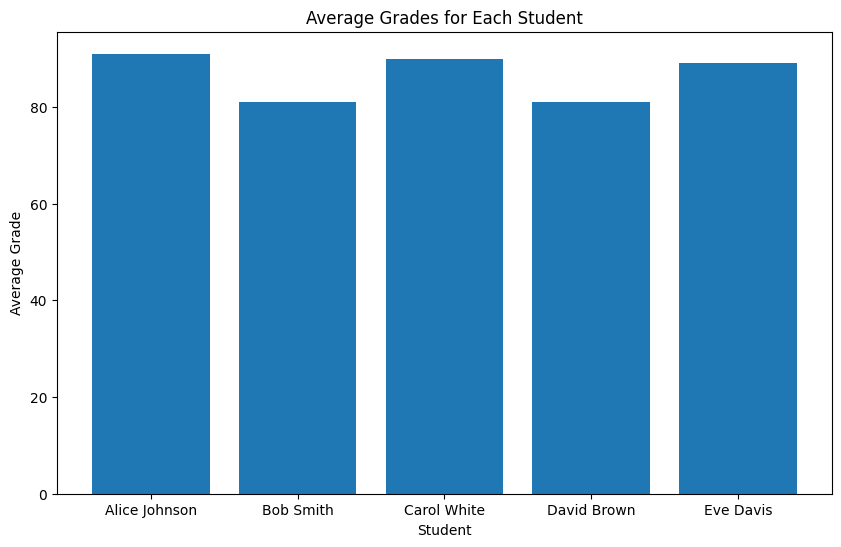

In [17]:
# plotting average grades for each student:
# calculating average grade per student
avg_grades_df = joined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

# plotting average grades
plt.figure(figsize=(10,6))
plt.bar(avg_grades_df['first_name'] + ' ' + avg_grades_df['last_name'], avg_grades_df['grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()


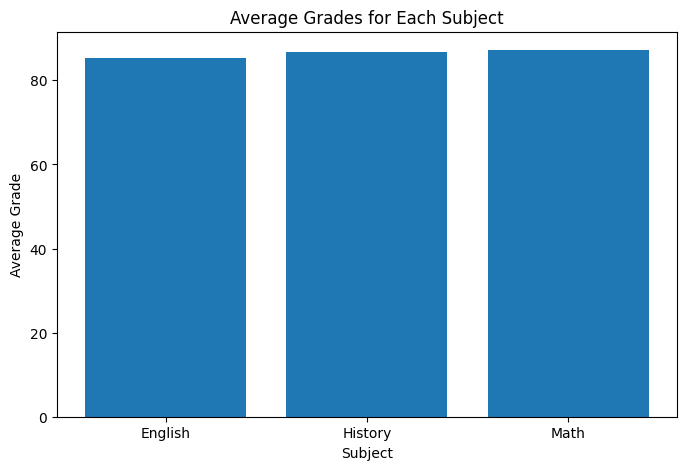

In [18]:
# creating a bar chart for average grade per subject:
# calculating average grade per subject
avg_subject_df = joined_df.groupby('subject')['grade'].mean().reset_index()

# plotting average grades for each subject
plt.figure(figsize=(8,5))
plt.bar(avg_subject_df['subject'], avg_subject_df['grade'])
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')
plt.show()


Bonus Task:

In [19]:
# query to find the student with the highest grade in each subject
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) as max_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
ORDER BY grades.subject
''')

# fetching results
highest_grade_per_subject = cursor.fetchall()
highest_grade_per_subject

[('Carol', 'White', 'English', 90),
 ('Carol', 'White', 'History', 91),
 ('Alice', 'Johnson', 'Math', 95)]

In [20]:
# converting the result into a Pandas DataFrame for easier manipulation
highest_grade_df = pd.DataFrame(highest_grade_per_subject, columns=['first_name', 'last_name', 'subject', 'max_grade'])

# displaying the DataFrame
highest_grade_df.head()


,first_name,last_name,subject,max_grade
0,Carol,White,English,90
1,Carol,White,History,91
2,Alice,Johnson,Math,95


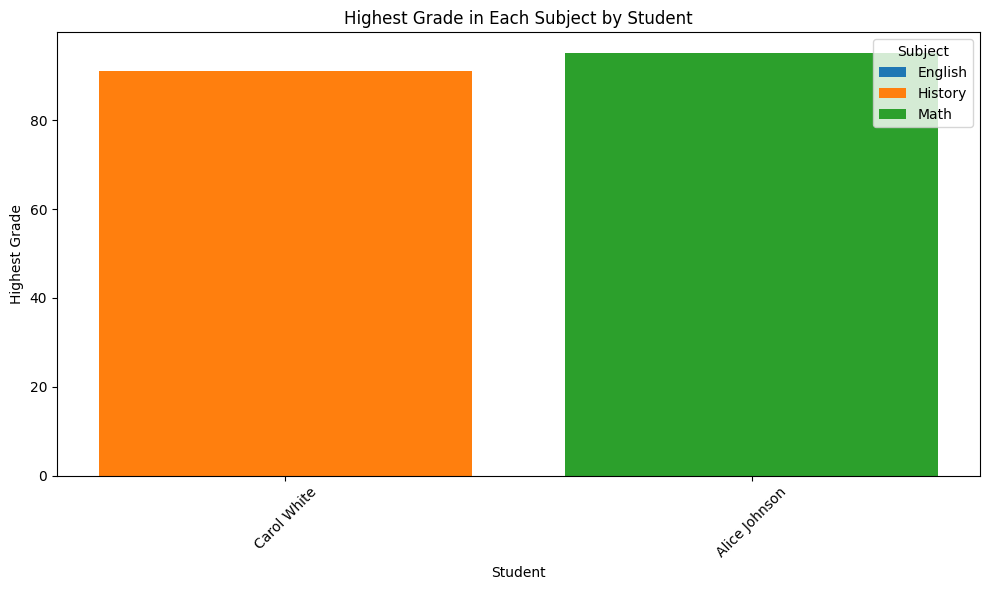

In [21]:
# Grouped bar chart for highest grades in each subject
plt.figure(figsize=(10,6))

# Plot the bar chart
for idx, subject in enumerate(highest_grade_df['subject'].unique()):
    # Filter data for each subject
    subject_data = highest_grade_df[highest_grade_df['subject'] == subject]
    plt.bar(subject_data['first_name'] + ' ' + subject_data['last_name'], subject_data['max_grade'], label=subject)

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Highest Grade')
plt.title('Highest Grade in Each Subject by Student')
plt.legend(title='Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
